# Install Required Packages

In [1]:
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install numpy
%pip install nltk
%pip install seaborn
%pip install regex
%pip install keras
%pip install gensim
%pip install tensorflow
%pip install -U azureml-fsspec mltable azure-ai-ml

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 3.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: mltable
    Found existing installation: mltable 1.6.0
    Uninstalling mltable-1.6.0:
      Successfully uninstalled mltable-1.6.0
Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [2]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import gensim
from gensim.models import Word2Vec

import pickle

from sklearn.model_selection import train_test_split

In [3]:
#nltk.download()
nltk.download('popular')
nltk.download('stopwords')
nltk.download('tagsets')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/azureuser/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/azureuser/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/azureuser/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/azureuser/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/azureuser/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/azureuser/nltk_data...
[nltk_data]    |   Package movie_review

True

# Reading Data

In [4]:
# Step 1: Reading Data from  Azure


import mltable
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

ml_client = MLClient.from_config(credential=DefaultAzureCredential())
data_asset = ml_client.data.get("amazon_fine_food_reviews_05", version="1")

path = {
  'folder': data_asset.path
}

tbl = mltable.from_delimited_files(paths=[path])
data = tbl.to_pandas_dataframe()
data

Found the config file in: /config.json


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


# Feature Engineering

## (Remove later) Cut dataset size for faster execution

In [5]:
data = data[:50000]

## Handle missing Values

In [6]:
# Handle missing values
data.dropna(inplace=True)

/tmp/ipykernel_4700/2077371693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


## Feature Selection

In [7]:
# Remove unused information
data.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary'], axis=1, inplace=True)
data.head()

/tmp/ipykernel_4700/430325462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary'], axis=1, inplace=True)


,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


## Explore Data Distribution

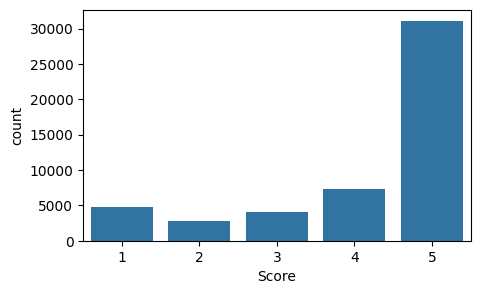

In [8]:
# Original Distribution:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Score'], data=data)
plt.show()

## Preprocess text

In [9]:
from nltk.corpus import stopwords
from nltk.stem import 	WordNetLemmatizer

# Text preprocessing steps

# Compile patterns for performance
TAG_RE = re.compile(r'<[^>]+>')
PUNCT_NUM_RE = re.compile('[^a-zA-Z]')
SINGLE_CHAR_RE = re.compile(r"\s+[a-zA-Z]\s+")
MULTI_SPACE_RE = re.compile(r'\s+')

# Initialize objects outside of function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
important_tags = ['FW', 'JJ', 'JJR', 'JJS', 'NN', 'NNP', 'NNS', \
                      'RB', 'RBR', 'RBS', 'RP', 'UH',  \
                      'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

# Text preprocessing
def preprocess_text(sen):
    # Lowercasing
    sentence = sen.lower()
    # Remove html tags
    sentence = TAG_RE.sub('', sentence)
    # Remove punctuations and numbers
    sentence = PUNCT_NUM_RE.sub(' ', sentence)
    # Single character removal
    sentence = SINGLE_CHAR_RE.sub(' ', sentence)
    # Remove multiple spaces
    sentence = MULTI_SPACE_RE.sub(' ', sentence).strip()

    # Tokenize
    tokens = nltk.word_tokenize(sentence)
    # POS Tagging for all tokens in one go
    tagged_tokens = nltk.pos_tag(tokens)

    # Lemmatize and remove stopwords and non-important POS tags
    filtered_tokens = [
        lemmatizer.lemmatize(word) 
        for word, tag in tagged_tokens
        if word not in stop_words
        and tag in important_tags
    ]

    processed_sentence = ' '.join(filtered_tokens)
    return processed_sentence

In [10]:
# Now apply preprocess_text to all rows in the 'Text' column
# and save the processed text back into the 'Text' column
data['Text'] = data['Text'].apply(preprocess_text)

Request time out. Ingestion may be backed up. Retrying.
/tmp/ipykernel_4700/4062364499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text'] = data['Text'].apply(preprocess_text)


In [11]:
data.head()

,Score,Text
0,5,bought several vitality canned dog food produc...
1,1,product arrived labeled jumbo salted peanut pe...
2,4,confection century light pillowy citrus gelati...
3,2,looking secret ingredient robitussin believe f...
4,5,great taffy great price wide assortment yummy ...


# Test / Train Split

Dividing Data into Train and Test Sets

In [12]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=11084)

print(train_df.shape)
print(test_df.shape)
train_df

(40000, 2)
(10000, 2)


,Score,Text
15447,5,hard find blend various flavor store love mang...
25637,5,pro high quality healthy product good value mo...
5018,5,whole family like tasty sweet much healthy bar...
45682,3,consumer gold kili regular plain asin epplwm g...
29246,5,like popcorn try counter top popcorn machine w...
...,...,...
4063,4,bought blue icicle quickly record trumpet line...
33480,4,coffee good medium tasting coffee bitterness l...
39156,5,year old miniature schnauzer love bone really ...
33370,3,wanted cooky really however let folk know come...


# Feature Encoding / Word Embedding

In [13]:
label_column='Score'
def X_y_split(df):
    X=df.drop(label_column, axis=1)
    y=df[label_column]

    # return split data
    return X, y

X_train, y_train = X_y_split(train_df)
X_test, y_test = X_y_split(test_df)

## Using TF-IDF

In [14]:
# Set the parameters for TF-IDF Vectorization
MAX_FEATURES = 1000
MIN_DF = 0.02
MAX_DF = 0.95
NGRAM_RANGE = (1,3)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF-Vectorizer
# Limit the features by using min and max df.
vectorizer_tfidf = TfidfVectorizer(max_features=MAX_FEATURES, min_df=MIN_DF, max_df=MAX_DF)

# Use fit_transform on the training data 
X_train_transformed = vectorizer_tfidf.fit_transform(X_train['Text'])
# transform the test data by using the Vectorizer
X_test_transformed = vectorizer_tfidf.transform(X_test['Text'])

In [16]:
# --> Each Review is now represented as one TF-IDF Vector
print(X_train_transformed.shape)
df_temp = pd.DataFrame(X_train_transformed[0].T.todense(), index=vectorizer_tfidf.get_feature_names_out(), columns=["tfidf"])
df_temp.sort_values(by=["tfidf"], ascending=False)

(40000, 293)


,tfidf
flavor,0.460373
blend,0.417187
hard,0.372485
chocolate,0.345163
store,0.307795
...,...
free,0.000000
found,0.000000
food,0.000000
flavored,0.000000


In [17]:
# Converting the transformed Training- and Testdata into DataFrames
train_df_transformed = pd.DataFrame(X_train_transformed.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
test_df_transformed = pd.DataFrame(X_test_transformed.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

# Adding the Labels to the DataFrames
train_df_transformed[label_column] = y_train.reset_index(drop=True)
test_df_transformed[label_column] = y_test.reset_index(drop=True)

train_df_transformed

,able,absolutely,actually,add,added,almost,also,alternative,always,amazing,...,well,went,white,whole,wish,wonderful,work,year,yet,Score
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.000000,0.0,5
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.280692,0.000000,0.0,5
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.339731,0.0000,0.0,0.000000,0.000000,0.0,5
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.000000,0.0,3
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.375422,0.000000,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.0,0.0,0.110377,0.0,0.0,0.223782,0.163633,0.0,0.0,0.0,...,0.171641,0.0,0.0,0.000000,0.1251,0.0,0.100119,0.000000,0.0,4
39996,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.000000,0.0,4
39997,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.298876,0.0,5
39998,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.000000,0.0,3


# Model Training
Training a Machine Learning Model for Classification


In [41]:
label_column='Score'

X_train = train_df_transformed.drop(label_column, axis=1)
y_train = train_df_transformed[label_column]

X_test = test_df_transformed.drop(label_column, axis=1)
y_test = test_df_transformed[label_column]

## Train Models

In [31]:
# Random Forest
model_random_forest = RandomForestClassifier(random_state=42)
model_random_forest.fit(X_train, y_train)
# This took about 23 seconds

RandomForestClassifier(random_state=42)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosted Decision Trees
model_gradient_boosted_decision_trees = GradientBoostingClassifier(
    max_leaf_nodes=128,
    min_samples_leaf=32,
    max_depth=12,
    learning_rate=0.1,
    n_estimators=100,
    validation_fraction=0.1,
    random_state=11
)

model_gradient_boosted_decision_trees.fit(X_train, y_train)

# This took about 15 minutes

GradientBoostingClassifier(max_depth=12, max_leaf_nodes=128,
                           min_samples_leaf=32, random_state=11)

Bad pipe message: %s [b'&\xd0\x0b\x7f\x0b\xa1\x03/\xb0w\xdc\x86\xb9\x8f\xaf\x16>\xd5 \xf7\x88\xf8\xd3\x08r\x15\x83\xb3K_\xd3\x8cf\xc8\xcbLCk\t\xef\xfd2q\xcc\xd7\xa8\x97\xedtM0\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08']
Bad pipe message: %s [b'\x08\x08\t\x08\n\x08']
Bad pipe message: %s [b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \xe5_\xe3\\\x86\xb2\xb9\xf1O9\xa8\xbd\xe5{\x12\xca\x1eqO\xfa\xe7\xa3']
Bad pipe message: %s [b'-\x8c\xdfJ\xfb3[\xac\xf5t\xdf\x87#\x06\x9eS\xa9. \xdf\x00\x07\x95A\x90\xacy\xb1\x84\xb4K\xb9\xbb\x9d5\xe5\x1b\x04\xe4D\x0bh\xe5\xfd\xa0\xeb\x07\t\xc77J\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00

## Save the trained models

In [46]:
import mlflow
import mlflow.sklearn

print('Saving models...')
mlflow.sklearn.save_model(model_random_forest, './models/model_random_forest_basic', classification_report(y_test, prediction, output_dict=True))
mlflow.sklearn.save_model(model_gradient_boosted_decision_trees, './models/model_gradient_boosted_decision_trees')
print('Done!')

Saving models...


MlflowException: Path './models/model_random_forest_basic' already exists and is not empty

# Evaluation

*   **Accuracy:** the percentage of texts that were predicted with the correct topic
*   **Precision:** the percentage of texts the model got right out of the total number of texts that it predicted for a given topic
*   **Recall:** the percentage of texts the model predicted for a given topic out of the total number of texts it should have predicted for that topic
*   **F1 Score:** the harmonic mean of precision and recall



In [28]:
def evaluate_model_with_prediction(model, name, prediction, y_test):
  accuracy = accuracy_score(y_test, prediction)
  print(f"{name} Accuracy: {accuracy}")

  # Confusion Matrix
  print(f"{name} Confusion Matrix:")
  plt.figure(figsize=(5,3))
  sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt='d', cmap='Blues', 
              xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
  plt.title(f'{name} Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

  # Detailed Classification Report (includes Precision, Recall, F1-Score)
  print(f"{name} Classification Report:")
  print(classification_report(y_test, prediction))
  return accuracy


Random Forest Basic Accuracy: 0.6864
Random Forest Basic Confusion Matrix:


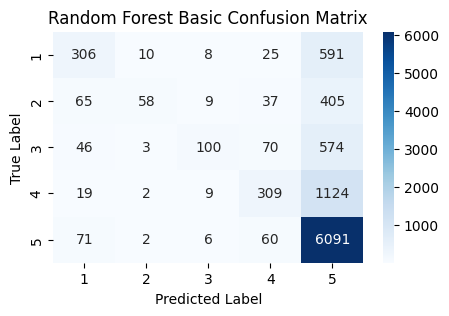

Random Forest Basic Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.33      0.42       940
           2       0.77      0.10      0.18       574
           3       0.76      0.13      0.22       793
           4       0.62      0.21      0.31      1463
           5       0.69      0.98      0.81      6230

    accuracy                           0.69     10000
   macro avg       0.69      0.35      0.39     10000
weighted avg       0.68      0.69      0.62     10000



0.6864

In [29]:
label_column='Score'

X_test = test_df_transformed.drop(label_column, axis=1)
y_test = test_df_transformed[label_column]

prediction = model_random_forest.predict(X_test)
evaluate_model_with_prediction(model_random_forest, 'Random Forest Basic', prediction, y_test)

In [40]:
classification_report(y_test, prediction, output_dict=True)

{'1': {'precision': 0.5652892561983471,
  'recall': 0.3638297872340426,
  'f1-score': 0.44271844660194176,
  'support': 940},
 '2': {'precision': 0.375,
  'recall': 0.08362369337979095,
  'f1-score': 0.1367521367521368,
  'support': 574},
 '3': {'precision': 0.3769230769230769,
  'recall': 0.1235813366960908,
  'f1-score': 0.18613485280151945,
  'support': 793},
 '4': {'precision': 0.440809968847352,
  'recall': 0.19343814080656185,
  'f1-score': 0.26888361045130643,
  'support': 1463},
 '5': {'precision': 0.71249252839211,
  'recall': 0.956661316211878,
  'f1-score': 0.816718054128126,
  'support': 6230},
 'accuracy': 0.6731,
 'macro avg': {'precision': 0.4941029660721773,
  'recall': 0.34422685486567284,
  'f1-score': 0.37024142014700606,
  'support': 10000},
 'weighted avg': {'precision': 0.6129255337132967,
  'recall': 0.6731,
  'f1-score': 0.6123786203881643,
  'support': 10000}}

Gradient Boosting Accuracy: 0.6731
Gradient Boosting Confusion Matrix:


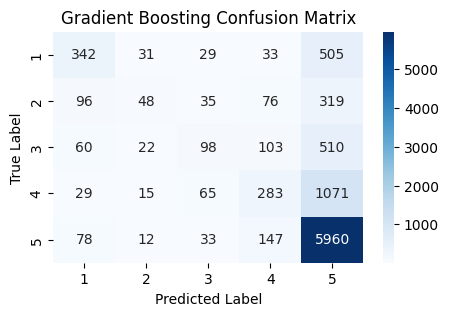

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.36      0.44       940
           2       0.38      0.08      0.14       574
           3       0.38      0.12      0.19       793
           4       0.44      0.19      0.27      1463
           5       0.71      0.96      0.82      6230

    accuracy                           0.67     10000
   macro avg       0.49      0.34      0.37     10000
weighted avg       0.61      0.67      0.61     10000



0.6731

In [36]:


prediction = model_gradient_boosted_decision_trees.predict(X_test)
evaluate_model_with_prediction(model_gradient_boosted_decision_trees, 'Gradient Boosting', prediction, y_test)